**Import important libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import FancyBboxPatch

**Create dataframe. Data source: "HappyDB: A Corpus of 100,000 Crowdsourced Happy Moments"**

In [3]:
d = {"%":[36, 35, 11, 9, 6, 2, 1],
                  "labels":['Achievement', 'Affection', 'Bonding', 'Enjoying the moment',
                            'Leisure', 'Nature', 'Exercise']}

df = pd.DataFrame(d)

**Create plot and customize aesthetics**

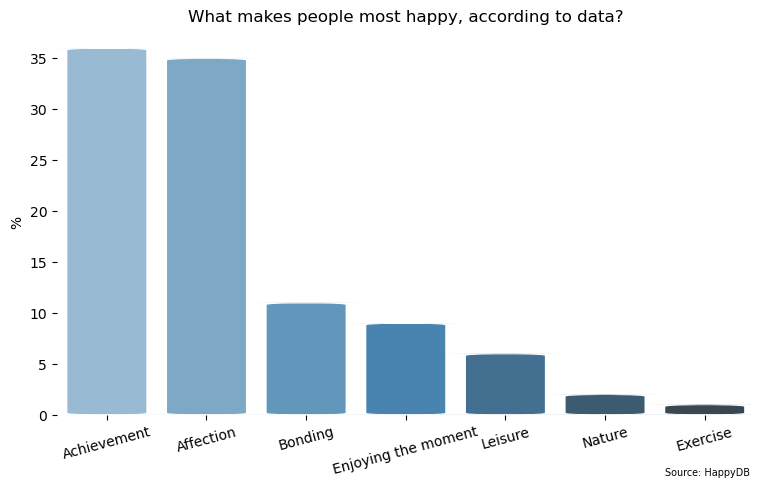

In [4]:
plt.figure(figsize=(9,5))

ax = sns.barplot(x="labels", y="%", data=df, palette="Blues_d", joinstyle='bevel')

# rounded edges of barplot
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=1",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)


ax.set(xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

ax.set(title='What makes people most happy, according to data?')

plt.text(5.6, -6, "Source: HappyDB", 
         size='x-small', color='black', fontweight='light')

plt.savefig('happiness.png', bbox_inches='tight', dpi = 300)
plt.show()